<a href="https://colab.research.google.com/github/acmcsufoss/fullypack_data_science/blob/main/Simple_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import packages

In [3]:
import pandas as pd

# Load data from Github

In [36]:
url = 'https://raw.githubusercontent.com/acmcsufoss/fullypack_data_science/main/World%20Universites%20Ranking%202023.csv'
df = pd.read_csv(url,encoding='windows-1252')

# Preview dataset

In [23]:
df.head()

,Rank,Name,No. of FTE Students,No. of students per staff,International Students,Female:Male Ratio
0,NaN,Country/Region,NaN,NaN,NaN,NaN
1,Reporter,Zarqa University,"5,768",18.1,32%,47:53:00
2,NaN,Jordan,NaN,NaN,NaN,NaN
3,Reporter,Ziauddin University,"4,906",8.8,1%,63:37:00
4,NaN,Pakistan,NaN,NaN,NaN,NaN


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4877 entries, 0 to 4876
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rank                       2345 non-null   object 
 1   Name                       4877 non-null   object 
 2   No. of FTE Students        2345 non-null   object 
 3   No. of students per staff  2344 non-null   float64
 4   International Students     2345 non-null   object 
 5   Female:Male Ratio          2255 non-null   object 
dtypes: float64(1), object(5)
memory usage: 228.7+ KB


# Preprocess Dataset

In [25]:
df.isnull().sum() #Check if any null value

Rank                         2532
Name                            0
No. of FTE Students          2532
No. of students per staff    2533
International Students       2532
Female:Male Ratio            2622
dtype: int64

In [26]:
df['Rank'] # Too many invalid value, it'd be a good idea to drop this column

0            NaN
1       Reporter
2            NaN
3       Reporter
4            NaN
          ...   
4872         NaN
4873           2
4874         NaN
4875           1
4876         NaN
Name: Rank, Length: 4877, dtype: object

In [37]:
df = df.drop('Rank', axis=1) #Drop the Rank column

In [28]:
df.head() 

,Name,No. of FTE Students,No. of students per staff,International Students,Female:Male Ratio
0,Country/Region,NaN,NaN,NaN,NaN
1,Zarqa University,"5,768",18.1,32%,47:53:00
2,Jordan,NaN,NaN,NaN,NaN
3,Ziauddin University,"4,906",8.8,1%,63:37:00
4,Pakistan,NaN,NaN,NaN,NaN


In [31]:
# Drop the Coutry/Region row since it doesn't contribute anything
df = df.drop(0)

In [32]:
df.head()

,Name,No. of FTE Students,No. of students per staff,International Students,Female:Male Ratio
1,Zarqa University,"5,768",18.1,32%,47:53:00
2,Jordan,NaN,NaN,NaN,NaN
3,Ziauddin University,"4,906",8.8,1%,63:37:00
4,Pakistan,NaN,NaN,NaN,NaN
5,Zhytomyr Polytechnic State University,"3,869",15.4,1%,34 : 66


In [38]:
# The country row not necessary, let's create a new column called Country
df['Country'] = ''

# combine every even row with the following odd row
for i in range(1, len(df)-1, 2):
    df.at[i, 'Country'] = df.at[i+1, 'Name']
    df = df.drop([i+1])

# drop the rows with NaN values
df = df.dropna()

In [39]:
df.head()

,Name,No. of FTE Students,No. of students per staff,International Students,Female:Male Ratio,Country
1,Zarqa University,"5,768",18.1,32%,47:53:00,Jordan
3,Ziauddin University,"4,906",8.8,1%,63:37:00,Pakistan
5,Zhytomyr Polytechnic State University,"3,869",15.4,1%,34 : 66,Ukraine
7,"Yusuf Maitama Sule University, Kano","12,880",33.0,0%,48:52:00,Nigeria
9,York St John University,"6,315",18.6,12%,65:35:00,United Kingdom


In [40]:
df.isna().sum() #Check if there's any N/A value

Name                         0
No. of FTE Students          0
No. of students per staff    0
International Students       0
Female:Male Ratio            0
Country                      0
dtype: int64

In [42]:
df.isnull().sum() #Check if there's any null value

Name                         0
No. of FTE Students          0
No. of students per staff    0
International Students       0
Female:Male Ratio            0
Country                      0
dtype: int64

In [45]:
preprocessed_df = df #Save it to a new dataframe

# Download processed dataset

In [61]:
from google.colab import files

In [62]:
preprocessed_df.to_csv('fullypack_ds_dataset.csv')
files.download('fullypack_ds_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Import Processed Dataset

In [111]:
url = "https://raw.githubusercontent.com/acmcsufoss/fullypack_data_science/main/fullypack_ds_dataset.csv"
new_df = pd.read_csv(url)

In [112]:
new_df.head()

,Unnamed: 0,Name,No. of FTE Students,No. of students per staff,International Students,Female:Male Ratio,Country
0,1,Zarqa University,"5,768",18.1,32%,47:53:00,Jordan
1,3,Ziauddin University,"4,906",8.8,1%,63:37:00,Pakistan
2,5,Zhytomyr Polytechnic State University,"3,869",15.4,1%,34 : 66,Ukraine
3,7,"Yusuf Maitama Sule University, Kano","12,880",33.0,0%,48:52:00,Nigeria
4,9,York St John University,"6,315",18.6,12%,65:35:00,United Kingdom


In [113]:
new_df = new_df.drop('Unnamed: 0',axis=1) #Drop the Unnamed:0 column

In [114]:
new_df.head()

,Name,No. of FTE Students,No. of students per staff,International Students,Female:Male Ratio,Country
0,Zarqa University,"5,768",18.1,32%,47:53:00,Jordan
1,Ziauddin University,"4,906",8.8,1%,63:37:00,Pakistan
2,Zhytomyr Polytechnic State University,"3,869",15.4,1%,34 : 66,Ukraine
3,"Yusuf Maitama Sule University, Kano","12,880",33.0,0%,48:52:00,Nigeria
4,York St John University,"6,315",18.6,12%,65:35:00,United Kingdom


# Exploratory Data Analysis

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
new_df['No. of FTE Students'] = new_df['No. of FTE Students'].str.replace(',', '').astype(int) #Remove comma so it reads as thousands

In [116]:
new_df = new_df.sort_values(by='No. of FTE Students', ascending=False) #sort dataframe to largest to smallest # students
new_df.head()

,Name,No. of FTE Students,No. of students per staff,International Students,Female:Male Ratio,Country
843,Tribhuvan University,460632,30.9,0%,50:50:00,Nepal
926,Cairo University,224216,36.8,4%,54:46:00,Egypt
744,National Autonomous University of Mexico,172729,17.4,4%,52:48:00,Mexico
831,Zagazig University,165556,26.4,2%,52:48:00,Egypt
826,Ain Shams University,138700,12.5,4%,53:47:00,Egypt


## Top 10 countries number of universities from the dataset

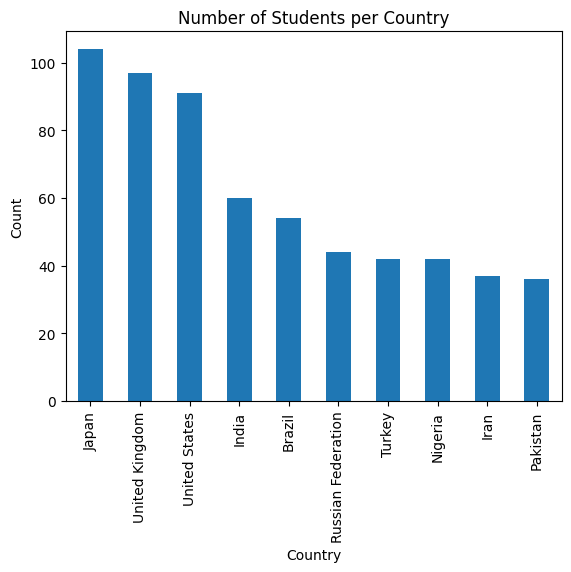

In [86]:
counts = new_df.groupby('Country').size().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('Number of Students per Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

# Most International Friendly country?

In [117]:
new_df['International Students'] = new_df['International Students'].str.replace('%','') #Remove %
new_df.head()

,Name,No. of FTE Students,No. of students per staff,International Students,Female:Male Ratio,Country
843,Tribhuvan University,460632,30.9,0,50:50:00,Nepal
926,Cairo University,224216,36.8,4,54:46:00,Egypt
744,National Autonomous University of Mexico,172729,17.4,4,52:48:00,Mexico
831,Zagazig University,165556,26.4,2,52:48:00,Egypt
826,Ain Shams University,138700,12.5,4,53:47:00,Egypt


In [119]:
new_df['International Students'].isnull().sum()

0

In [122]:
print(new_df['International Students'].dtype)

object


In [125]:
new_df['International Students'] = pd.to_numeric(new_df['International Students']) #Convert to numberic value

In [131]:
most_international = new_df.loc[new_df['International Students'].idxmax()]
print(most_international['Name'])

Paris University of International Education
